In [1]:
import aprofiles as apro
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors

In [ ]:
path_eprofile_alc = '/home/bia/Data/E_PROFILE_ALC/L2/L2_0-756-2-ERISWIL_A20250101.nc'
path_testl2 = '/home/bia/euliaa_postproc/data/L2Test_NC_for_Aprofiles.nc'

In [3]:
profiles_alc = apro.reader.ReadProfiles(path_eprofile_alc).read()
profiles_test = apro.reader.ReadProfiles(path_testl2).read()

/home/bia/acbr/.venv/lib/python3.10/site-packages/xarray/coding/times.py:1005: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)


In [20]:
profiles_alc.clouds(method="vg",zmin=0, thr_noise=.5, thr_clouds=2, verbose=False)
profiles_test.clouds(method="vg",zmin=0, thr_noise=1.5, thr_clouds=2, verbose=False,time_avg=0)
# profiles_alc.plot(show_clouds=True,vmin=1e-3,vmax=1e1,cmap='plasma',log=True,zmax=40000)
# # profiles_test.plot(show_clouds=True,vmin=1e-9,vmax=1e-5,cmap='plasma',log=True,zmax=40000)


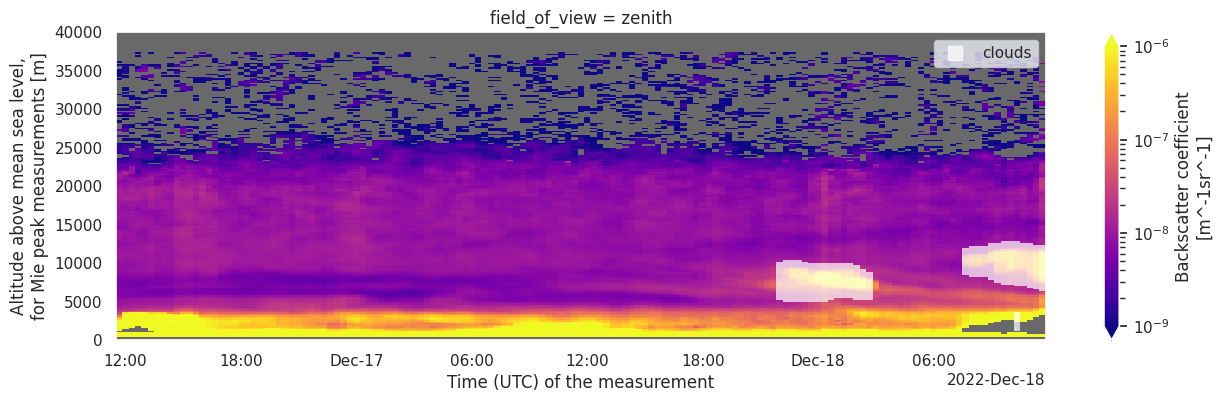

In [21]:
fig,ax = plt.subplots(figsize=(15,4))
profiles_test.data.attenuated_backscatter_0.T.plot(vmin=1e-9,vmax=1e-6,cmap='plasma',norm=colors.LogNorm(),ylim=(0,40000))
plt.gca().set_facecolor('dimgray')
cloud_mask = xr.where(profiles_test.data.clouds,1, np.nan)
# cloud_mask.where(~cloud_mask, np.nan)
cloud_mask.T.plot(alpha=.7,vmin=0, vmax=1, cmap='Greys_r',ylim=(0,40000),add_colorbar=False)
ax.plot([],[],lw=0,marker='s', ms=10, color='white', alpha=.7, label='clouds')
ax.legend(loc='upper right')

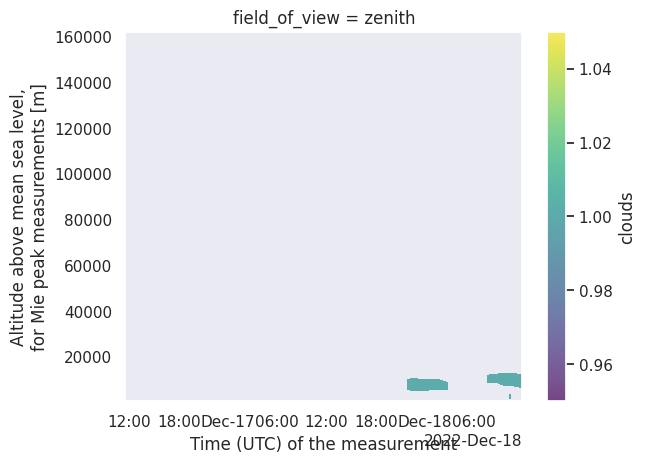

In [14]:
cloud_mask = profiles_test.data.clouds*1.
cloud_mask = xr.where(cloud_mask>0, 1, np.nan)
cloud_mask.T.plot(alpha=.7)#,cmap='Grays')

In [ ]:
xr.w

<xarray.DataArray 'clouds' (time: 145, altitude: 811)> Size: 118kB
array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])
Coordinates:
  * time           (time) datetime64[ns] 1kB 2022-12-16T11:40:00 ... 2022-12-...
  * altitude       (altitude) float32 3kB 525.0 725.0 ... 1.621e+05 1.622e+05
    field_of_view  <U6 24B 'zenith'
Attributes:
    long_name:  Clouds mask
    units:      bool
    time_avg:   1
    method:     vg
    options:    {'zmin': 0, 'thr_noise': 1.5, 'thr_clouds': 2, 'min_snr': 0.0}

In [85]:
cloud_mask.max()

<xarray.DataArray 'clouds' ()> Size: 8B
array(1.)
Coordinates:
    field_of_view  <U6 24B 'zenith'

In [78]:
profiles_test.data

<xarray.Dataset> Size: 595kB
Dimensions:                   (time: 145, altitude: 811)
Coordinates:
  * time                      (time) datetime64[ns] 1kB 2022-12-16T11:40:00 ....
  * altitude                  (altitude) float32 3kB 525.0 725.0 ... 1.622e+05
    field_of_view             <U6 24B 'zenith'
Data variables:
    attenuated_backscatter_0  (time, altitude) float32 470kB 0.0003215 ... nan
    station_latitude          float64 8B 54.12
    station_longitude         float64 8B 11.77
    station_altitude          float64 8B 10.0
    vertical_resolution       float64 8B ...
    vertical_integration      float64 8B ...
    time_integration          float64 8B ...
    time_resolution           float64 8B ...
    l0_wavelength             int64 8B 386
    latitude                  (time) float64 1kB ...
    longitude                 (time) float64 1kB ...
    clouds                    (time, altitude) bool 118kB False False ... False
Attributes: (12/20)
    Conventions:              CF-1.12
    campaign_name:            
    license:                  
    references:               
    wigos_station_id:         0-20000-0-06610
    wmo_id:                   06610
    ...                       ...
    calibration_status:       
    conventions:              
    operation_mode:           Mie Wind 3 FOV
    algorithm_code_version:   alpha 42.42
    algorithm_code:           
    algorithm_reference: